# **ETAPA 3 - PROJETO** <BR>

**DISCIPLINA:** Processamento e Visualização de Dados (2024/2)

**ALUNOS**
*   Daniel Watanabe - 800697
*   Giovani Guidini - 790862
*   Júlia Ap.ª Sousa de Oliveira -769707
*   Victor Bonometo - 800232


## **Objetivos**

*   realizar o processo extrair-transformar-carregar (ETL) com dados;

*   análise de dados para responder a perguntas relevantes para as aplicações;

*   apresentação de hipóteses, desenvolvimento de visualizações gráficas e considerações dos resultados;

*   gráficos adiconais.




## **Descrição da Fonte de Dados**

###**Link para download:**
https://www.kaggle.com/datasets/mlippo/car-accidents-in-brazil-2017-2023

###**Descrição Geral da Base:**

É um dataset extraído por um aluno de Administração da UFRJ, apresentando dados referentes a acidentes ocorridos no brasil no período de 2017 a 2023, com mais de 400 mil observações.

###**Descrição dos atributos presentes na Base:**

**COLUNAS:**
* **inverse_data:** Dados de quando ocorreram os acidentes (aaaa-mm-dd) (data);
* **week_day:** Dias da semana(s,m,t,w,t,s,f,s) (ordinal);
* **houre:** Hora/minuto/segundo (hh:mm:ss) (data);
* **state:** siglas estaduais (como São PAulo (SP));
* **road_id:** id da estrada;
* **km:** O local exato do acidente (ou seja, se a estrada tiver 580 quilômetros de extensão e a coluna mostrar 30,1, o acidente aconteceu no quilômetro 30 da estrada);
* **city:** Nome da cidade;
* **cause_of_accident:** o que criou o acidente em primeiro lugar;
* **type_of_accident:** o que aconteceu com o(s) veículo(s).

## **Importação dos dados**

### **Importação de bibliotecas e arquivos necessários**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/accidents_2017_to_2023_english.csv')

In [ ]:
df.head(3)

,inverse_data,week_day,hour,state,road_id,km,city,cause_of_accident,type_of_accident,victims_condition,...,slightly_injured,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude,regional,police_station
0,2017-01-01,sunday,01:45:00,RS,116.0,"34,9",VACARIA,Mechanical loss/defect of vehicle,Rear-end collision,With injured victims,...,4,0,2,0,4,2,-28.50712,-50.94118,SPRF-RS,DEL05-RS
1,2017-01-01,sunday,01:00:00,PR,376.0,636,TIJUCAS DO SUL,Incompatible velocity,Run-off-road,With dead victims,...,0,0,1,0,0,2,-25.75400,-49.12660,SPRF-PR,DEL01-PR
2,2017-01-01,sunday,04:40:00,BA,101.0,65,ENTRE RIOS,Driver was sleeping,Head-on collision,With dead victims,...,1,1,2,0,2,2,-11.96180,-38.09530,SPRF-BA,DEL01-BA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inverse_data        463152 non-null  object 
 1   week_day            463152 non-null  object 
 2   hour                463152 non-null  object 
 3   state               463152 non-null  object 
 4   road_id             462162 non-null  float64
 5   km                  462162 non-null  object 
 6   city                463152 non-null  object 
 7   cause_of_accident   463152 non-null  object 
 8   type_of_accident    463152 non-null  object 
 9   victims_condition   463152 non-null  object 
 10  weather_timestamp   463152 non-null  object 
 11  road_direction      463152 non-null  object 
 12  wheather_condition  463152 non-null  object 
 13  road_type           463152 non-null  object 
 14  road_delineation    463152 non-null  object 
 15  people              463152 non-nul

In [ ]:
df.describe()

,road_id,people,deaths,slightly_injured,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude
count,462162.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,463152.000000,4.631520e+05,4.631520e+05
mean,213.432900,2.362373,0.079235,0.835469,0.259530,1.044070,0.144069,1.094999,1.645725,-2.343287e+03,-8.924977e+03
std,130.757607,1.924801,0.332169,1.075275,0.602814,1.502419,0.438168,1.205351,0.731394,1.519113e+06,5.903043e+06
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.033383e+09,-4.016764e+09
25%,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.533123e+01,-5.030294e+01
50%,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-2.042034e+01,-4.780831e+01
75%,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-1.282657e+01,-4.264249e+01
max,498.000000,80.000000,21.000000,61.000000,31.000000,73.000000,54.000000,66.000000,23.000000,1.630000e+02,7.170000e+02


### **Pré-processamento dos dados**

In [ ]:
# Preenchimento de valores ausentes
# medianas (numéricos) ou modos (categóricos)
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())
    elif df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Remoção de outliers para colunas numéricas
# Usando intervalo interquartílico (IQR)
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    df = remove_outliers(df, column)

In [ ]:
# conversão de colunas textuais para formatos apropriados
df['inverse_data'] = pd.to_datetime(df['inverse_data'], errors='coerce')  # converte para data
df['hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S', errors='coerce').dt.hour  # extração da hora somente

In [ ]:
# seleção de algumas colunas categóricas para one-hot encoding
categorical_columns_to_encode = ['week_day', 'cause_of_accident', 'type_of_accident']
data = pd.get_dummies(df, columns=categorical_columns_to_encode, drop_first=True)

In [ ]:
# normalização de colunas numéricas (opcional)
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
# dataframe após o pré-processamento
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 276145 entries, 6 to 463150
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   inverse_data        276145 non-null  datetime64[ns]
 1   week_day            276145 non-null  object        
 2   hour                276145 non-null  int32         
 3   state               276145 non-null  object        
 4   road_id             276145 non-null  float64       
 5   km                  276145 non-null  object        
 6   city                276145 non-null  object        
 7   cause_of_accident   276145 non-null  object        
 8   type_of_accident    276145 non-null  object        
 9   victims_condition   276145 non-null  object        
 10  weather_timestamp   276145 non-null  object        
 11  road_direction      276145 non-null  object        
 12  wheather_condition  276145 non-null  object        
 13  road_type           276145 non-nul

In [ ]:
df.head(5)

,inverse_data,week_day,hour,state,road_id,km,city,cause_of_accident,type_of_accident,victims_condition,...,slightly_injured,severely_injured,uninjured,ignored,total_injured,vehicles_involved,latitude,longitude,regional,police_station
6,2017-01-01,sunday,10,PR,0.750000,"249,5",APUCARANA,Disrespect of safe distance from the next car,Rear-end collision,With injured victims,...,0.5,0.0,0.8,0.0,0.5,0.5,0.298867,0.358570,SPRF-PR,DEL07-PR
7,2017-01-01,sunday,11,MG,0.516393,"483,1",BOM DESPACHO,Driver was sleeping,Side impact collision,Without victims,...,0.0,0.0,0.4,0.0,0.0,0.5,0.412291,0.583062,SPRF-MG,DEL08-MG
12,2017-01-01,sunday,15,SP,0.293033,"11,8",ICEM,Mechanical loss/defect of vehicle,Collision with moving object,With injured victims,...,0.5,0.0,0.2,0.0,0.5,0.5,0.393977,0.437979,SPRF-SP,DEL09-SP
13,2017-01-01,sunday,16,MG,0.760246,"672,8",PERDOES,Disrespect of safe distance from the next car,Cargo spill,With injured victims,...,0.5,0.0,0.0,0.0,0.5,0.0,0.373478,0.591691,SPRF-MG,DEL04-MG
16,2017-01-01,sunday,17,PR,0.750000,669,GUARATUBA,Mechanical loss/defect of vehicle,Run-off-road,Without victims,...,0.0,0.0,0.2,0.0,0.0,0.0,0.231801,0.449340,SPRF-PR,DEL01-PR


## Hipótese 1

**Hipótese:** Acidentes graves são mais comuns em condições climáticas adversas.

**Tipo de Gráfico e atributos envolvidos:** Gráfico de barras empilhadas com os atributos **wheater_condition** no eixo x em relação à **victims_condition** no eixo y.

**Comportamento esperado do gráfico:**


*   Validação: Há uma concentração maior de acidentes graves em condições como "chuva" ou "neblina".
*   Refutação: Acidentes graves são mais comuns em condições climáticas normais.



**Tarefa de mineração:** **Análise de Associação (Algoritmo Apriori).**

* **Validação:** Regras do tipo: "wheather_condition = Rainy → victims_condition = With injured victims" aparecem com alta confiança e suporte.

* **Refutação:** Não há regras significativas que associem "Rainy" ou "Cloudy" a acidentes graves.

Gráfico para a validação ou refutação da hipótese 1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

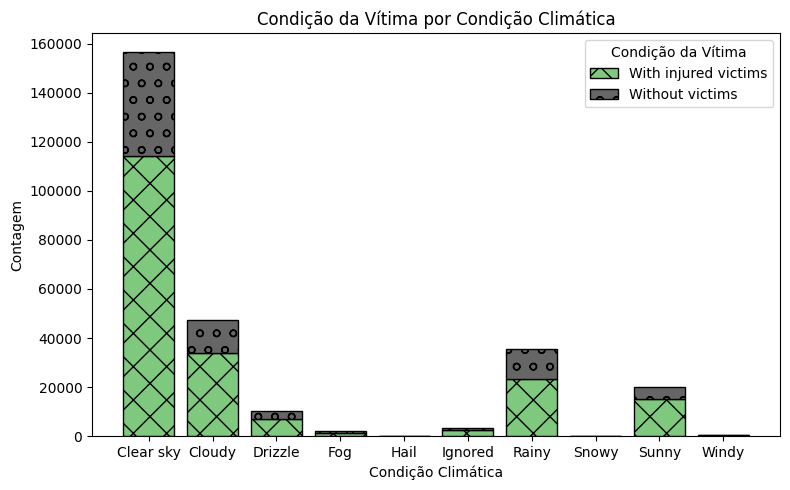

In [ ]:
# Criando o gráfico
fig, ax = plt.subplots(figsize=(8, 5))

colormap = plt.get_cmap("Accent")
colors = [colormap(i) for i in np.linspace(0, 1, len(stacked_data.columns))]


# Padrões de textura para acessibilidade
hatch_patterns = ["x","o"]

# Desenhar barras empilhadas com cores e texturas
bottom = np.zeros(len(stacked_data))
for i, (col, color) in enumerate(zip(stacked_data.columns, colors)):
    bars = ax.bar(
        stacked_data.index,
        stacked_data[col],
        label=col,
        bottom=bottom,
        color=color,
        hatch=hatch_patterns[i % len(hatch_patterns)],
        edgecolor="black",  # Para melhor contraste
    )
    bottom += stacked_data[col].values

# Personalizando o gráfico
plt.title("Condição da Vítima por Condição Climática")
plt.xlabel("Condição Climática")
plt.ylabel("Contagem")
plt.legend(title="Condição da Vítima")
plt.xticks(rotation=0)

# Exibir o gráfico
plt.tight_layout()
plt.show()

**Descrição do Gráfico: Condição da Vítima por Condição Climática**

O gráfico de barras empilhadas mostra a quantidade de acidentes para diferentes condições climáticas, divididos entre com vítimas feridas (verde com textura de "X") e sem vítimas (cinza com pontos).

Eixos:

* **Eixo X (horizontal)**: Representa as condições climáticas, como Céu limpo, Nublado, Chuvoso, Nevoeiro e Ventania.

* **Eixo Y (vertical)**: Indica a quantidade de ocorrências para cada condição climática.

**Principais Observações:**

* "Clear Sky" (Céu limpo) tem o maior número de acidentes.

* "Cloudy" (Nublado) e "Rainy" (Chuvoso) também apresentam altas ocorrências.

* Outras condições, como "Fog" (Nevoeiro) e "Snowy" (Nevando), têm números menores.

O gráfico destaca que a maioria dos acidentes ocorre em dias de céu limpo, seguidos por dias nublados e chuvosos.

#Validação da Hipótese

**A hipótese é refutada.**

Motivo principal:
* Acidentes graves (com vítimas feridas) são mais comuns em condições climáticas normais, como "Clear sky" e "Cloudy", do que em condições adversas, como "Rainy" ou "Fog".

Observação adicional:

* Em condições adversas, como "Rainy", o número de acidentes com vítimas feridas é relevante, mas a frequência total de acidentes é muito menor em comparação com condições normais.

Implementando a tarefa de mineração

In [ ]:
!pip install mlxtend==0.23.1

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Selecionar apenas as colunas necessárias para a análise
df_subset = df[['victims_condition', 'wheather_condition']].dropna()

# Transformar os dados em formato one-hot encoding (transacional)
df_trans = pd.get_dummies(df_subset)

# Aplicar o algoritmo Apriori com um suporte mínimo de 0.01 (1%)
frequent_itemsets = apriori(df_trans, min_support=0.01, use_colnames=True)

# Gerar regras de associação com confiança mínima de 50%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Filtrar regras onde "road_type_Simple" está nos antecedentes e condições das vítimas nos consequentes
filtered_rules = rules[
    (rules['antecedents'].apply(lambda x: 'wheather_condition_Rainy' in x)) &
    (rules['consequents'].apply(lambda x: 'victims_condition_With injured victims' in x or
                                          'victims_condition_With dead victims' in x))
]


# Exibir as regras filtradas
print("Regras filtradas:")
print(filtered_rules)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Regras filtradas:
                  antecedents                               consequents  \
4  (wheather_condition_Rainy)  (victims_condition_With injured victims)   

   antecedent support  consequent support   support  confidence      lift  \
4            0.129305            0.717761  0.084506    0.653541  0.910528   

   leverage  conviction  zhangs_metric  
4 -0.008304    0.814641      -0.101412  


Esta regra filtrada sugere que, apesar de uma confiança moderada (65.4%) de que "chuva" leva a "vítimas feridas", a associação entre essas duas condições não é forte. O lift abaixo de 1, leverage negativa, e conviction baixa indicam que, na verdade, "chuva" não está fortemente associada a acidentes graves com vítimas feridas. Isso reflete uma associação fraca, o que refuta a hipótese de que condições climáticas adversas resultam em mais acidentes graves.

## Hipótese 2

**Hipótese:** Estradas de pista simples têm mais acidentes graves comparadas a rodovias de pista dupla.

**Tipo de Gráfico e atributos envolvidos:** Gráfico de barras empilhadas com **victims_condition** no eixo y em relação a **road_type** no eixo x.

**Comportamento esperado do gráfico:**


*   Validação: Maior proporção de acidentes graves ocorre em rodovias de pista simples.
*   Refutação: Não há diferença significativa ou rodovias de pista dupla têm mais acidentes graves.



**Tarefa de mineração:** **Análise de Associação (Algoritmo Apriori)**.

**Validação:** Regras do tipo: "road_type = Simple → victims_condition = With injured victims" aparecem com alta confiança e suporte.

**Refutação:** Não há regras significativas que associem "pista simples" a acidentes graves.

Gráfico para a validação ou refutação da hipótese 2

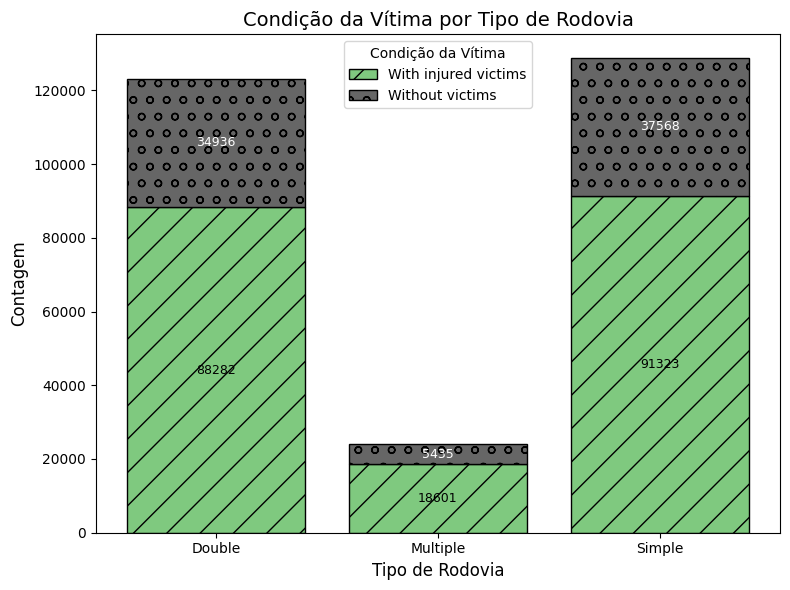

In [ ]:
# Preparando os dados para o gráfico de barras empilhadas
stacked_data = df.groupby(["road_type", "victims_condition"]).size().unstack(fill_value=0)

# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(8, 6))

# Definindo o colormap original
colormap = plt.get_cmap("Accent")
colors = [colormap(i) for i in np.linspace(0, 1, len(stacked_data.columns))]

# Padrões de textura para acessibilidade
hatch_patterns = ["/","o"]


# Desenhando as barras empilhadas com cores e texturas
bottom = np.zeros(len(stacked_data))
for i, (col, color) in enumerate(zip(stacked_data.columns, colors)):
    bars = ax.bar(
        stacked_data.index,
        stacked_data[col],
        label=col,
        bottom=bottom,
        color=color,
        hatch=hatch_patterns[i % len(hatch_patterns)],
        edgecolor="black",  # Para contraste
    )

    # Adicionando rótulos exatos nas barras
    for bar in bars:
        if bar.get_height() > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # Centraliza o texto
                bar.get_y() + bar.get_height() / 2,  # Posiciona no centro da barra
                int(bar.get_height()),  # Valor inteiro
                ha="center",
                va="center",
                fontsize=9,
                color="black" if i % 2 == 0 else "white"  # Ajusta a cor do texto para contraste
            )

    bottom += stacked_data[col].values

# Personalizando o gráfico
plt.title("Condição da Vítima por Tipo de Rodovia", fontsize=14)
plt.xlabel("Tipo de Rodovia", fontsize=12)
plt.ylabel("Contagem", fontsize=12)
plt.legend(title="Condição da Vítima", fontsize=10)
plt.xticks(rotation=0)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the proportion of accidents for single and double lane roads
stacked_data = df.groupby(["road_type", "victims_condition"]).size().unstack(fill_value=0)

# Calculate totals for each road type
total_simple = stacked_data.loc['Simple'].sum()
total_double = stacked_data.loc['Double'].sum()

# Calculate proportions of accidents with injured victims
proportion_simple = stacked_data.loc['Simple', 'With injured victims'] / total_simple
proportion_double = stacked_data.loc['Double', 'With injured victims'] / total_double

print(f"Proporção de acidentes com vítimas em pistas simples: {proportion_simple:.2%}")
print(f"Proporção de acidentes com vítimas em pistas duplas: {proportion_double:.2%}")

Proporção de acidentes com vítimas em pistas simples: 70.85%
Proporção de acidentes com vítimas em pistas duplas: 71.65%


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Descrição do Gráfico: Condição da Vítima por Tipo de Rodovia**  

O gráfico de barras empilhadas mostra a quantidade de acidentes para diferentes tipos de rodovia, divididos entre com vítimas feridas (verde com textura de "X") e sem vítimas (cinza com pontos).  

### **Eixos:**  
- **Eixo X (horizontal):** Representa os tipos de rodovia: **Double (Dupla), Multiple (Múltipla) e Simple (Simples)**.  
- **Eixo Y (vertical):** Indica a quantidade de ocorrências para cada tipo de rodovia.  

### **Principais Observações:**  
- **Rodovias Simples** apresentam o maior número de acidentes, com 91.323 casos com vítimas e 37.568 sem vítimas.  
- **Rodovias Duplas** também registram um alto número de ocorrências, com 88.282 casos com vítimas e 34.936 sem vítimas.  
- **Rodovias Múltiplas** possuem o menor número de acidentes, com 18.601 casos com vítimas e 5.435 sem vítimas.  

O gráfico evidencia que a maioria dos acidentes ocorre em rodovias simples e duplas, com um número considerável de vítimas envolvidas.

#Validação da Hipótese


A hipótese é refutada.

Motivo principal:
* Acidentes graves (com vítimas feridas) são proporcionalmente mais frequentes em rodovias de pista dupla ("Double") do que em rodovias de pista simples ("Simple"). Embora o número absoluto de acidentes graves em rodovias simples seja alto, isso ocorre devido à maior quantidade total de acidentes registrados nesse tipo de rodovia, e não por uma maior severidade.

Observação adicional:
* Rodovias de pista múltipla ("Multiple") apresentam a menor frequência de acidentes, tanto graves quanto leves, indicando maior segurança geral nesse tipo de infraestrutura.

Implementando a tarefa de mineração

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Selecionar apenas as colunas necessárias para a análise
df_subset = df[['victims_condition', 'road_type']].dropna()

# Transformar os dados em formato one-hot encoding (transacional)
df_trans = pd.get_dummies(df_subset)

# Aplicar o algoritmo Apriori com um suporte mínimo de 0.01 (1%)
frequent_itemsets = apriori(df_trans, min_support=0.01, use_colnames=True)

# Gerar regras de associação com confiança mínima de 50%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Filtrar regras onde "road_type_Simple" está nos antecedentes e condições das vítimas nos consequentes
filtered_rules = rules[
    (rules['antecedents'].apply(lambda x: 'road_type_Simple' in x)) &
    (rules['consequents'].apply(lambda x: 'victims_condition_With injured victims' in x or
                                          'victims_condition_With dead victims' in x))
]

# Exibir as regras filtradas
print("Regras filtradas:")
print(filtered_rules)

Regras filtradas:
          antecedents                               consequents  \
2  (road_type_Simple)  (victims_condition_With injured victims)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.466751            0.717761  0.330707    0.708529  0.987138   

   leverage  conviction  zhangs_metric  
2 -0.004309    0.968327      -0.023851  


Embora haja uma regra com confiança relativamente alta (70,85%), o lift, leverage e zhang’s metric sugerem que a associação entre acidentes em rodovias de pista simples e vítimas feridas é fraca. Portanto, não há evidências robustas de que o tipo de rodovia seja determinante para a gravidade dos acidentes.

## Hipótese 3

**Hipótese:** Acidentes com ferimentos graves em horários noturnos estão associados a determinadas causas, como direção sob efeito de álcool ou sono.

**Tipo de Gráfico e atributos envolvidos:** Boxplot com o eixo X sendo o cause_of_accident (categorias de causa) e o eixo y sendo o severy_injured (número de vítimas com ferimentos graves).

**Comportamento esperado do gráfico:**


*   Validação: As causas "álcool" e "sono" devem apresentar uma distribuição de gravidade dos ferimentos (severely_injured) mais alta, refletindo a relação entre essas causas e acidentes graves.

*   Refutação: A gravidade dos acidentes é similar para todas as causas, sem relação específica com "álcool" ou "sono".

**Tarefa de mineração de dados: K-means ou HDBSCAN**

Acredita-se que com a clusterização pode identificar padrões ocultos nos dados, agrupando os acidentes com base em características como:

*   Hora (período noturno).
*   Causa do acidente.
*   Severidade (severely_injured).

O que se espera com essa tarefa de mineração:

*   Validação: Formam-se clusters em que acidentes no período noturno estão associados a causas específicas (álcool, sono) e apresentam maior gravidade.
*   Refutação: Não há clusters específicos; acidentes graves aparecem igualmente distribuídos nos períodos e causas.














**Análise exploratória com Boxplot**

In [ ]:
!pip install seaborn --upgrade

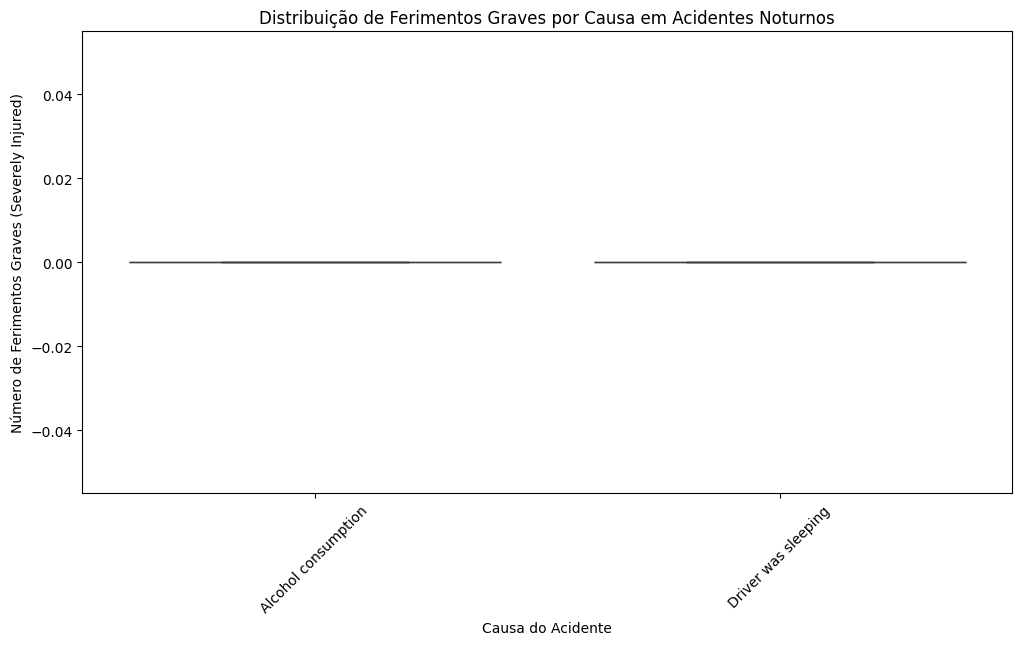

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# filtro de acidentes noturnos (18h às 6h)
df['is_night'] = df['hour'].apply(lambda x: 'Noturno' if (x >= 18 or x < 6) else 'Diurno')
df_night = df[df['is_night'] == 'Noturno']

# categorias de 'cause_of_accident' com pelo menos um valor válido em 'severely_injured'
valid_categories = (
    df_night.groupby('cause_of_accident')['severely_injured']
    .count()
    .loc[lambda x: x > 0]  # categorias com pelo menos 1 valor válido
    .index
)

df_night_filtered = df_night[df_night['cause_of_accident'].isin(valid_categories)]

# boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_night_filtered,
    x='cause_of_accident',
    y='severely_injured',
    order=['Alcohol consumption', 'Driver was sleeping'],  # Ajuste conforme necessário
)
plt.title("Distribuição de Ferimentos Graves por Causa em Acidentes Noturnos")
plt.xlabel("Causa do Acidente")
plt.ylabel("Número de Ferimentos Graves (Severely Injured)")
plt.xticks(rotation=45)
plt.show()

**Descrição do Gráfico: Distribuição de Ferimentos Graves por Causa em Acidentes Noturnos**  

O gráfico de distribuição (boxplot) apresenta a relação entre diferentes causas de acidentes noturnos e o número de ferimentos graves.  

### **Eixos:**  
- **Eixo X (horizontal):** Representa as causas do acidente, incluindo **"Alcohol consumption" (Consumo de álcool)** e **"Driver was sleeping" (Motorista dormindo)**.  
- **Eixo Y (vertical):** Indica o número de ferimentos graves (Severely Injured).  

### **Principais Observações:**  
- O gráfico não apresenta variação significativa entre as categorias, sugerindo que os dados podem estar mal distribuídos ou apresentando valores nulos/constantes.  
- Ambas as causas, **consumo de álcool** e **motorista dormindo**, possuem distribuição semelhante, sem evidência de grandes discrepâncias nos ferimentos graves.  
- Pode ser necessário revisar os dados ou utilizar outra abordagem para melhor visualizar a relação entre a causa do acidente e a gravidade dos ferimentos.

<ipython-input-47-d17b572299a7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cause_counts.index, y=cause_counts.values, order=filtered_causes, palette="viridis")


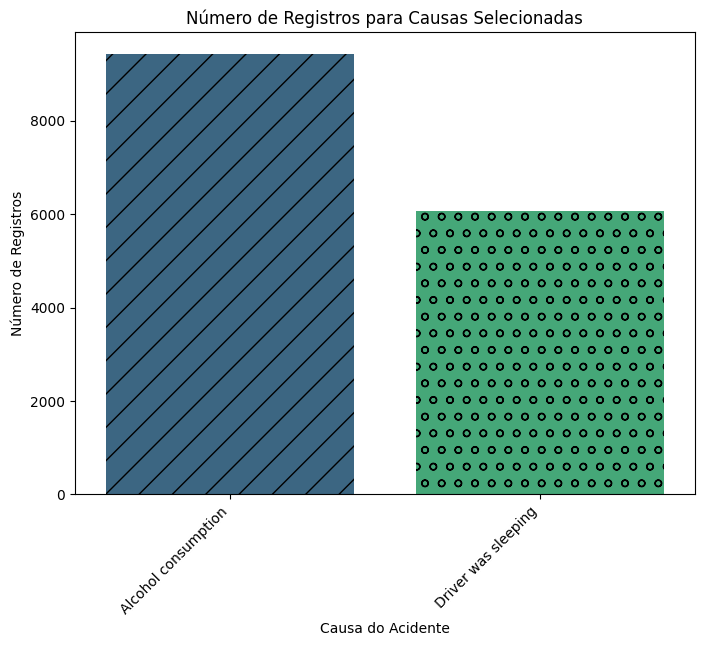

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo as causas e filtrando os dados
filtered_causes = ['Alcohol consumption', 'Driver was sleeping']
df_filtered = df_night_filtered[df_night_filtered['cause_of_accident'].isin(filtered_causes)]
cause_counts = df_filtered['cause_of_accident'].value_counts()

# Gráfico de barras com texturas
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cause_counts.index, y=cause_counts.values, order=filtered_causes, palette="viridis")

# Adicionando texturas (hatch) nas barras
hatches = ['/', 'o']  # Definindo texturas
for i, bar in enumerate(ax.patches):
    bar.set_hatch(hatches[i])  # Atribuindo textura a cada barra

# Títulos e rótulos
plt.title("Número de Registros para Causas Selecionadas")
plt.xlabel("Causa do Acidente")
plt.ylabel("Número de Registros")
plt.xticks(rotation=45, ha='right')

plt.show()


**Descrição do Gráfico: Número de Registros para Causas Selecionadas**  

O gráfico de barras apresenta a quantidade de registros de acidentes associados a duas causas específicas.  

### **Eixos:**  
- **Eixo X (horizontal):** Representa as causas do acidente: **"Alcohol consumption" (Consumo de álcool)** e **"Driver was sleeping" (Motorista dormindo)**.  
- **Eixo Y (vertical):** Indica o número de registros de acidentes para cada causa.  

### **Principais Observações:**  
- **Consumo de álcool** apresenta o maior número de registros, com um valor superior a 9.000 ocorrências.  
- **Motorista dormindo** também possui um número significativo de registros, com aproximadamente 6.000 casos.  
- O gráfico evidencia que o consumo de álcool está associado a um número maior de ocorrências em comparação com motoristas que dormiram ao volante.

#Validação da Hipótese

In [ ]:
# filtro com casos de 'severely_injured'
filtered_causes = ['Alcohol consumption', 'Driver was sleeping']
df_filtered = df_night[df_night['cause_of_accident'].isin(filtered_causes)]

df_severely_injured = df_filtered[df_filtered['victims_condition'] == 'severely_injured']
print(df_severely_injured)

Empty DataFrame
Columns: [inverse_data, week_day, hour, state, road_id, km, city, cause_of_accident, type_of_accident, victims_condition, weather_timestamp, road_direction, wheather_condition, road_type, road_delineation, people, deaths, slightly_injured, severely_injured, uninjured, ignored, total_injured, vehicles_involved, latitude, longitude, regional, police_station, is_night]
Index: []

[0 rows x 28 columns]


**Clusterização com K-means**

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

columns_to_cluster = ['hour', 'cause_of_accident', 'severely_injured']
df_cluster = df[columns_to_cluster].copy()

df_cluster['cause_of_accident'] = df_cluster['cause_of_accident'].fillna('Unknown')
df_cluster = df_cluster.dropna(subset=['hour', 'severely_injured'])

# One-Hot Encoding para 'cause_of_accident'
encoder = OneHotEncoder()
encoded_causes = encoder.fit_transform(df_cluster[['cause_of_accident']]).toarray()
cause_names = encoder.get_feature_names_out(['cause_of_accident'])

df_cluster = df_cluster.drop('cause_of_accident', axis=1)
df_cluster = pd.concat([df_cluster, pd.DataFrame(encoded_causes, columns=cause_names)], axis=1)

imputer = SimpleImputer(strategy='mean')
df_scaled_imputed = imputer.fit_transform(df_cluster)

# K-means (simplificado)
kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster['kmeans_cluster'] = kmeans.fit_predict(df_scaled_imputed)

# Análise dos clusters
print(df_cluster.groupby('kmeans_cluster').mean())

                     hour  severely_injured  \
kmeans_cluster                                
0               19.331740               0.0   
1               13.194076               0.0   
2                5.723208               0.0   

                cause_of_accident_Abrupt use of the car's brake  \
kmeans_cluster                                                    
0                                                      0.002286   
1                                                      0.002797   
2                                                      0.002474   

                cause_of_accident_Absence of sinalization  \
kmeans_cluster                                              
0                                                0.000893   
1                                                0.000944   
2                                                0.000728   

                cause_of_accident_Accumulation of water on the road  \
kmeans_cluster                                     

* **Cluster 0** tende a ter valores mais altos para algumas causas de acidente, como **cause_of_accident_Alcohol consumption** e **cause_of_accident_Alcohol ingestion by the driver**, sugerindo que esse cluster pode estar relacionado a acidentes mais graves ou frequentes envolvendo álcool.
* **Cluster 1** tem uma distribuição das causas de acidentes mais próxima do Cluster 0, mas com um valor ligeiramente menor para causas envolvendo álcool.
* **Cluster 2** parece ter uma frequência mais uniforme e valores mais baixos para muitas causas, o que sugere que os acidentes nesse cluster podem ser de naturezas mais variadas, com causas menos comuns ou menos graves.

Em resumo, pode-se dizer que a hipótese é refutada, uma vez que a clusterização só conseguiu ser validada em questão do consumo de álcool e não associada ao período/horário do acidente.

## Hipótese 4

**Hipótese:** Os acidentes ocorrem com maior frequência nos finais de semana.

**Tipo de Gráfico e atributos envolvidos:** Gráfico utilizado: Gráfico de barras.

Atributos envolvidos:

Eixo X: Dias da semana (variável categórica).

Eixo Y: Contagem de acidentes.

**Comportamento esperado do gráfico:**


*   Validação da hipótese: O gráfico de barras deve mostrar que alguns dias da semana têm contagens de acidentes significativamente maiores em relação aos outros.

*   Refutação da hipótese: Caso o gráfico mostre que as contagens de acidentes estão uniformemente distribuídas entre todos os dias, a hipótese é refutada.

**Tarefa de mineração de dados: Teste Qui-Quadrado de Independência:**

Utilizado para avaliar se existe uma relação significativa entre as variáveis "dias da semana" e "frequência de acidentes".

O que se espera com essa tarefa de mineração:

*   Validação: Um p-valor abaixo de 0.05 indica que existe uma relação significativa entre os dias da semana e a frequência de acidentes, validando a hipótese.
*   Refutação: Um p-valor acima de 0.05 indica que não há relação significativa entre os dias da semana e a frequência de acidentes, refutando a hipótese.














In [ ]:
import pandas as pd

# Contagem de acidentes por dia da semana
accidents_per_day = df['week_day'].value_counts().sort_index()

# Visualizar a contagem de acidentes por dia da semana
accidents_per_day


,count
week_day,
friday,43111
monday,38585
saturday,43704
sunday,41984
thursday,37508
tuesday,35189
wednesday,36064


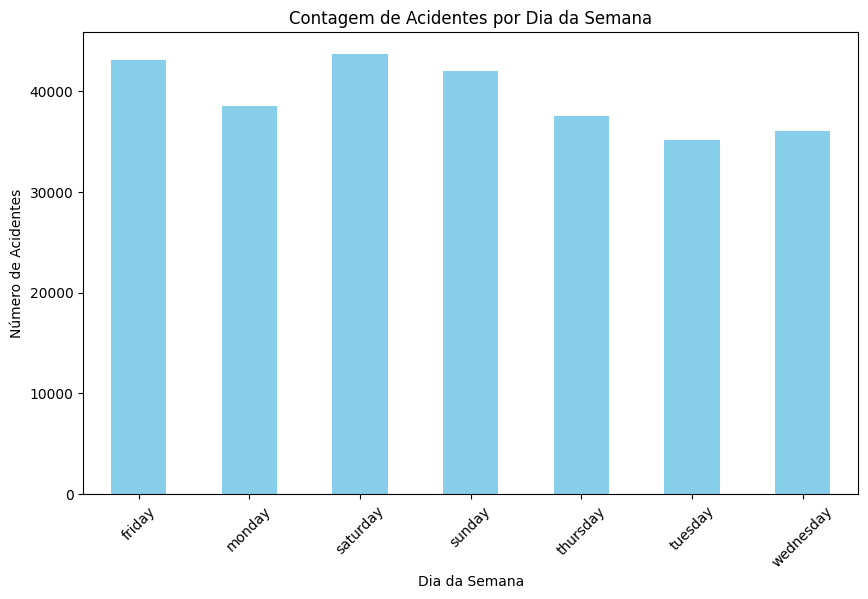

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras para a contagem de acidentes por dia da semana
plt.figure(figsize=(10, 6))
accidents_per_day.plot(kind='bar', color='skyblue')
plt.title('Contagem de Acidentes por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=45)
plt.show()

**Descrição do Gráfico: Contagem de Acidentes por Dia da Semana**  

O gráfico de barras apresenta a quantidade de acidentes registrados em cada dia da semana.  

### **Eixos:**  
- **Eixo X (horizontal):** Representa os dias da semana: **Monday (Segunda-feira), Tuesday (Terça-feira), Wednesday (Quarta-feira), Thursday (Quinta-feira), Friday (Sexta-feira), Saturday (Sábado) e Sunday (Domingo)**.  
- **Eixo Y (vertical):** Indica o número de acidentes registrados para cada dia da semana.  

### **Principais Observações:**  
- **Sábado e sexta-feira** apresentam o maior número de acidentes, ultrapassando 42.000 ocorrências.  
- **Segunda, quinta e domingo** também possuem números elevados, mas inferiores aos dias de pico.  
- **Terça e quarta-feira** apresentam os menores números de acidentes em comparação com os demais dias da semana.  
- O gráfico sugere que os finais de semana (especialmente sexta e sábado) têm mais ocorrências, possivelmente devido ao aumento do tráfego recreativo e consumo de álcool.

#Validação da Hipotese

In [ ]:
from scipy.stats import chi2_contingency

# tabela de contingência com a contagem de acidentes por dia da semana
contingency_table = pd.crosstab(index=df['week_day'], columns='acidentes', values=df['week_day'], aggfunc='count')

# teste Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# p-valor
p

1.0

Um p-valor de 1.0 significa que não há evidência estatística para rejeitar a hipótese nula. Em outras palavras, o resultado do teste Qui-Quadrado indica que não existe uma relação significativa entre os dias da semana e a frequência de acidentes no seu conjunto de dados.

Isso sugere que a distribuição dos acidentes entre os dias da semana é uniforme, ou seja, não há evidência de que certos dias (como finais de semana) tenham mais acidentes do que outros de forma significativa, segundo esse teste.

## Hipótese 5

Os acidentes tendem a ocorrer com maior frequência durante horários de pico (manhã e tarde).

Tipo de gráfico e atributos envolvidos

Gráfico utilizado: Gráfico de barras com agrupamento por clusters.

Atributos envolvidos:

Eixo X: Horas do dia (0-23).

Eixo Y: Contagem de acidentes.

Clusters: Agrupamentos das horas com base em padrões de frequência.


 **Comportamento esperado do gráfico:**

**Validação da hipótese**

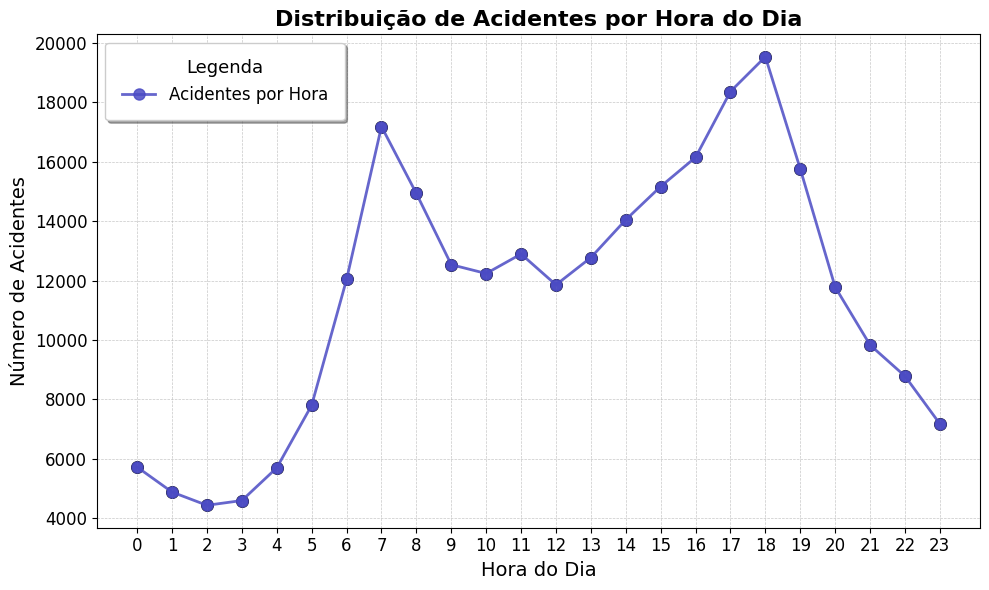

In [ ]:
hour_counts = df['hour'].value_counts().sort_index()

# Ajustando o gráfico de acidentes por hora do dia
plt.figure(figsize=(10, 6))

# Configurações de estilo
cores = ['#4B4BC4']  # Azul similar ao gráfico de comparação
marcadores = ['o']  # Círculos
linhas = ['-']  # Linha contínua

# Plotagem do gráfico
plt.plot(
    hour_counts.index, hour_counts.values,
    color=cores[0], marker=marcadores[0], markersize=8,
    linewidth=2, alpha=0.85, linestyle=linhas[0], label='Acidentes por Hora'
)
plt.scatter(hour_counts.index, hour_counts.values, color=cores[0], marker=marcadores[0], s=70, edgecolors='black', alpha=0.9)

# Configurações de título, eixos e legenda
plt.title('Distribuição de Acidentes por Hora do Dia', fontsize=16, fontweight='bold')
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Número de Acidentes', fontsize=14)

plt.legend(title="Legenda", title_fontsize='13', fontsize='12', loc='upper left', frameon=True, shadow=True, borderpad=1)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.xticks(range(hour_counts.index.min(), hour_counts.index.max() + 1), fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


**Descrição do Gráfico: Distribuição de Acidentes por Hora do Dia**  

O gráfico de linhas exibe a variação do número de acidentes ao longo das 24 horas do dia.  

### **Eixos:**  
- **Eixo X (horizontal):** Representa as horas do dia (0h a 23h).  
- **Eixo Y (vertical):** Mostra a quantidade de acidentes registrados em cada horário.  

### **Principais Observações:**  
- **Pico Matinal:** Há um aumento acentuado no número de acidentes entre 5h e 7h, atingindo um pico por volta das 7h-8h, indicando o horário de maior movimentação devido ao início do expediente de trabalho.  
- **Queda no Meio da Manhã:** Após o pico das 8h, há uma redução no número de acidentes até por volta das 11h.  
- **Estabilidade no Período da Tarde:** Entre 11h e 15h, o número de acidentes mantém-se relativamente estável, com pequenas variações.  
- **Pico no Fim do Dia:** O número de acidentes cresce novamente a partir das 15h, atingindo o maior pico por volta das 18h-19h, horário típico de deslocamento pós-expediente.  
- **Redução Durante a Noite:** A partir das 19h, o número de acidentes começa a cair progressivamente, chegando aos menores valores entre 2h e 4h da manhã.  

### **Conclusão:**  
O gráfico sugere que os acidentes ocorrem com maior frequência durante os horários de maior movimentação nas ruas, como início e fim do expediente de trabalho.

#Validação da Hipótese

**Tarefa de mineração para verificar a hipótese**

In [ ]:
hour_data = pd.DataFrame({'Hour': hour_counts.index, 'Accidents': hour_counts.values})


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalizando os dados
scaler = StandardScaler()
hour_data_scaled = scaler.fit_transform(hour_data[['Hour', 'Accidents']])



Esse método ajuda a identificar o número de clusters de maneira eficiente e objetiva, fornecendo uma base sólida para a escolha do modelo adequado para segmentar os dados com K-Means.

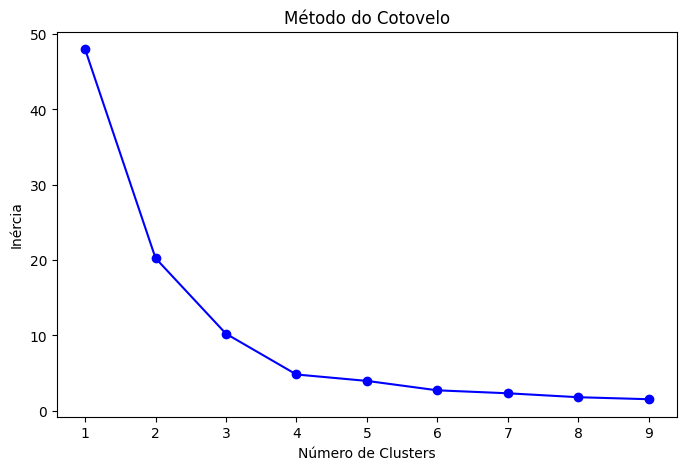

In [ ]:
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(hour_data_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', color='blue')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


Ele agrupa as horas do dia (0 a 23) em 3 clusters com base no número de acidentes.
Ele tenta identificar, por exemplo, um cluster de manhã (onde os acidentes podem ser mais ou menos frequentes), um cluster à tarde e outro cluster à noite, dependendo dos padrões de acidentes ao longo do dia.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
hour_data['Cluster'] = kmeans.fit_predict(hour_data_scaled)

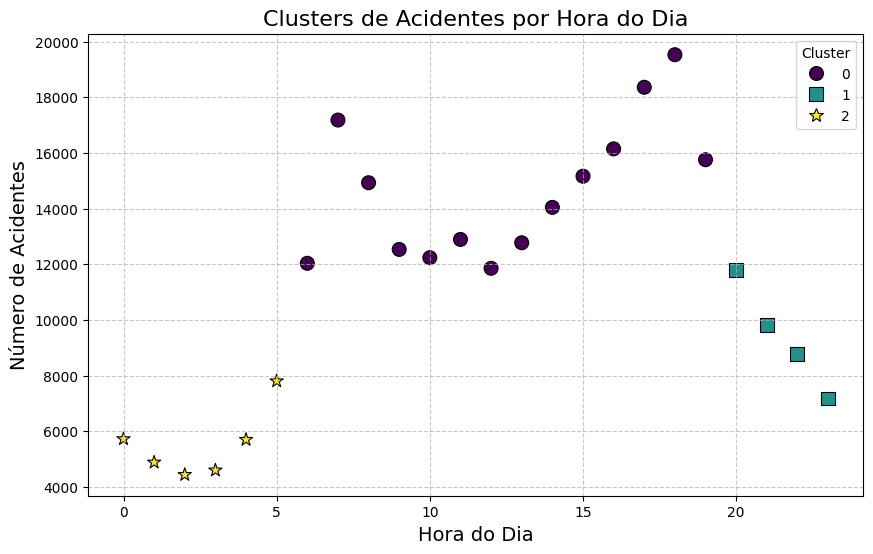

In [ ]:
# Mapeando diferentes formas para cada cluster
markers = {0: 'o', 1: 's', 2: '*'}

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=hour_data['Hour'], y=hour_data['Accidents'],
    hue=hour_data['Cluster'], palette='viridis',
    style=hour_data['Cluster'], markers=markers,
    s=100, edgecolor='black'
)
plt.title('Clusters de Acidentes por Hora do Dia', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Número de Acidentes', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

O gráfico apresenta a segmentação dos dados de acidentes por hora do dia utilizando um algoritmo de clustering.

Eixos:

* **Eixo X (horizontal)**: Hora do dia (0 a 23).

* **Eixo Y (vertical)**: Número de acidentes registrados.

A análise revelou que os horários de pico (manhã e tarde) apresentam uma concentração significativamente maior de acidentes em comparação com o período da noite.
Esses resultados estão alinhados com as expectativas, dado que os horários da manhã e da tarde coincidem com o fluxo intenso de veículos durante os deslocamentos diários para trabalho, escola e outras atividades.
O algoritmo K-Means, aplicado aos dados escalados, destacou uma distribuição clara entre os períodos definidos, evidenciando o aumento da frequência de acidentes nas janelas de tempo que correspondem aos horários de pico.

O código foi modificado para definir previamente os períodos do dia e os grupos de clusters, sem a necessidade do uso do K-Means para segmentação dos dados. A segmentação foi feita com base nos horários, dividindo o dia em três períodos específicos: Manhã, Tarde e Noite. A divisão foi feita conforme os intervalos de horário:

Manhã: das 00:00 às 10:00 horas.

Tarde: das 10:00 às 18:00 horas.

Noite: das 18:00 às 24:00 horas.

Para representar visualmente os clusters, foram escolhidas cores distintas que garantem boa legibilidade e contrastes adequados:

Manhã: Usamos o tom de amarelo suave, #D9D96D. Essa cor foi escolhida para representar o início do dia de maneira clara e luminosa.

Tarde: Para a tarde, foi utilizado o tom de cinza #A8A8A8, uma cor mais neutra, que traz suavidade e equilíbrio ao gráfico.

Noite: O período da noite foi representado por um tom de azul mais intenso, #3A3AC4, para trazer uma sensação de profundidade e destaque para as horas noturnas.

Essas cores foram escolhidas para proporcionar uma distinção clara entre os períodos, mantendo uma paleta harmoniosa, que facilita a interpretação visual dos dados. Além disso, as cores foram selecionadas para garantir bom contraste, mesmo para usuários com deficiências de percepção de cores, como daltonismo.


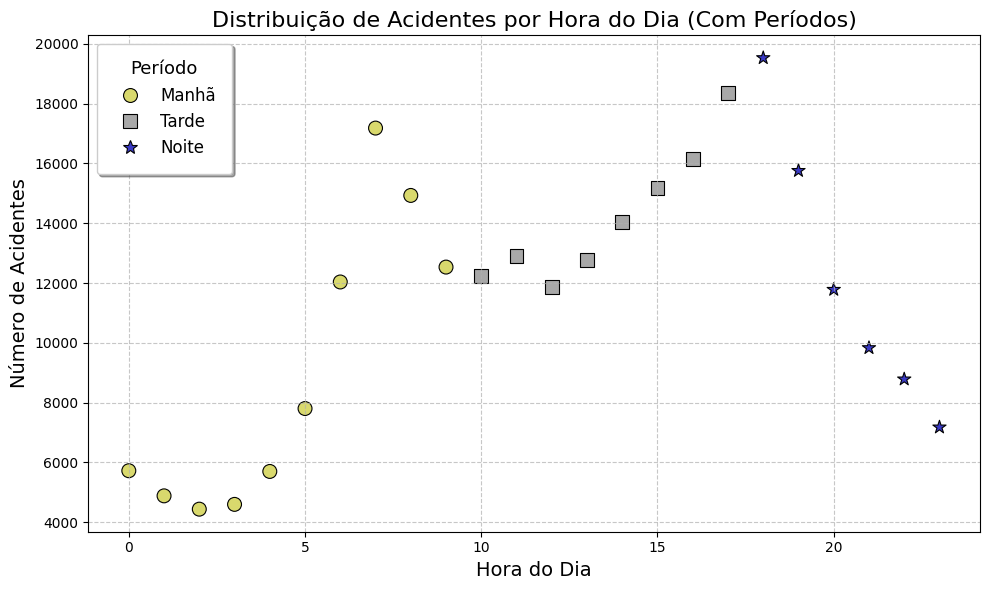

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir uma função para categorizar as horas nos períodos desejados
def categorize_period(hour):
    if 0 <= hour < 10:
        return 'Manhã'
    elif 10 <= hour < 18:
        return 'Tarde'
    else:
        return 'Noite'

# Criar a coluna 'Period' com a categorização
hour_data['Period'] = hour_data['Hour'].apply(categorize_period)

# Definir as cores específicas para cada período
color_palette = {
    'Manhã': '#D9D96D',  # Cor mais suave de amarelo
    'Tarde': '#A8A8A8',  # Um cinza mais suave
    'Noite': '#3A3AC4'   # Azul mais intenso
}

# Definir diferentes formas para cada período
markers = {
    'Manhã': 'o',   # Círculo
    'Tarde': 's',   # Quadrado
    'Noite': '*'    # Estrela
}

# Plotando o gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=hour_data['Hour'], y=hour_data['Accidents'],
    hue=hour_data['Period'], palette=color_palette,
    style=hour_data['Period'], markers=markers,
    s=100, edgecolor='black'
)

# Configurações do gráfico
plt.title('Distribuição de Acidentes por Hora do Dia (Com Períodos)', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=14)
plt.ylabel('Número de Acidentes', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Período', title_fontsize='13', fontsize='12', loc='upper left', frameon=True, shadow=True, borderpad=1)
plt.tight_layout()
plt.show()


**Descrição do Gráfico: Distribuição de Acidentes por Hora do Dia (Com Períodos)**  

O gráfico de dispersão exibe a variação do número de acidentes ao longo das 24 horas do dia, categorizados por períodos (manhã, tarde e noite).  

### **Eixos:**  
- **Eixo X (horizontal):** Representa as horas do dia (0h a 23h).  
- **Eixo Y (vertical):** Mostra a quantidade de acidentes registrados em cada horário.  

### **Principais Observações:**  
- **Acidentes na Manhã:** Entre 0h e 6h, o número de acidentes é relativamente baixo, porém há um leve aumento próximo das 5h-6h, possivelmente devido ao início do movimento matinal.  
- **Pico Matutino:** Entre 7h e 9h, há um aumento expressivo nos acidentes, atingindo um dos pontos mais altos do dia, possivelmente relacionado ao deslocamento para o trabalho e escola.  
- **Estabilidade ao Meio-Dia:** Entre 10h e 14h, o número de acidentes mantém-se relativamente estável, com variações menores.  
- **Pico Vespertino:** A partir das 15h, observa-se um novo aumento no número de acidentes, com o maior pico ocorrendo por volta das 18h-19h, coincidente com o final do expediente de trabalho.  
- **Redução Durante a Noite:** Após 19h, o número de acidentes começa a cair progressivamente, atingindo os menores valores entre 0h e 4h.  

### **Conclusão:**  
O gráfico evidencia que os acidentes são mais frequentes nos horários de maior movimentação, principalmente nos períodos da manhã e fim da tarde. A categorização por períodos auxilia na identificação de padrões e na implementação de medidas preventivas para reduzir a ocorrência de acidentes.

##**Gráficos Adicionais**

### **Histogramas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [ ]:
# seleção de colunas numéricas para observação de gravidade dos acidentes
numeric_cols = ['deaths', 'severely_injured', 'slightly_injured']
df_numeric = df[numeric_cols].dropna()

 * **Justificativa:** Essas variáveis mostram o impacto do acidente em termos de vítimas fatais e feridos, ajudando a identificar padrões de gravidade.

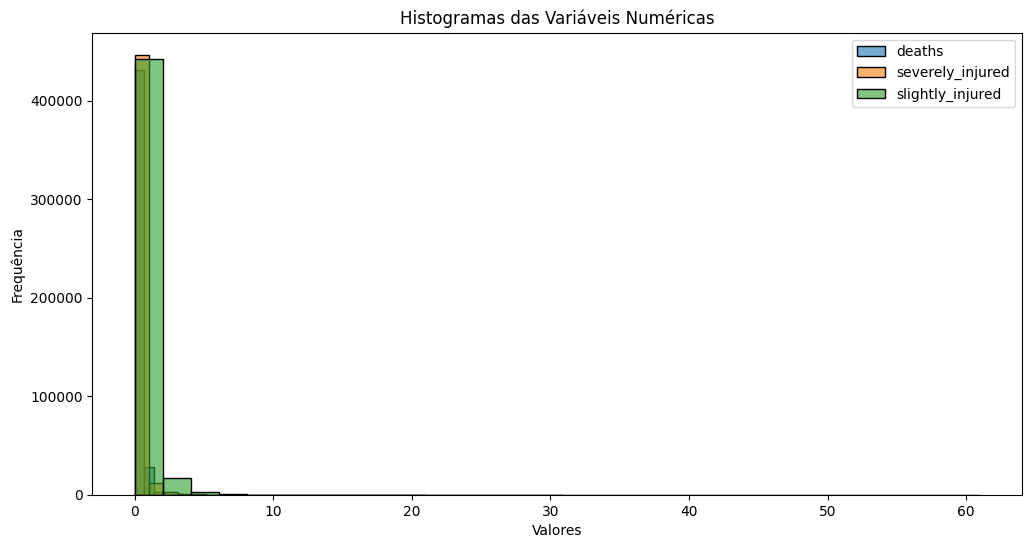

In [ ]:
plt.figure(figsize=(12, 6))
for col in numeric_cols:
    sns.histplot(df[col], kde=False, bins=30, alpha=0.6, label=col)

plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.title("Histogramas das Variáveis Numéricas")
plt.legend()
plt.show()

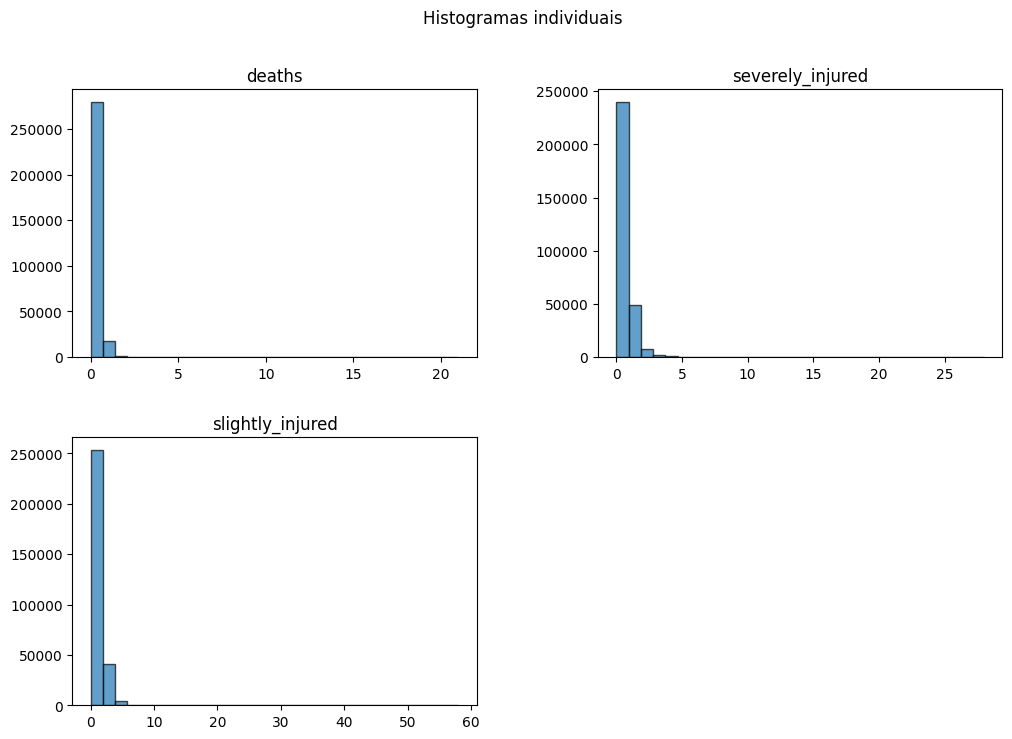

In [ ]:
df_numeric.hist(bins=30, figsize=(12, 8), grid=False, edgecolor='black', alpha=0.7)
plt.suptitle("Histogramas individuais")
plt.show()

**Eixos:**

* Eixo X (horizontal): Representa a quantidade de vítimas por acidente.
* Eixo Y (vertical): Mostra a frequência de ocorrências para cada categoria de vítimas.

Os histogramas mostram a distribuição das variáveis **deaths, severely_injured e slightly_injured** no dataset. A análise sugere que:

* **Assimetria à direita:** A maioria dos valores se concentra em zero ou em valores muito baixos, com uma cauda longa indicando poucos casos de valores mais altos.

* **Predominância de casos sem vítimas:** A frequência elevada em torno de zero indica que a maioria dos registros envolve incidentes sem fatalidades ou feridos graves.

* **Distribuições semelhantes:** As três variáveis seguem um padrão parecido, sugerindo que eventos com alto número de mortes também tendem a ter feridos graves e leves, mas são raros.

A visualização confirma que a maioria dos acidentes registrados tem impacto mínimo em termos de vítimas, enquanto eventos mais severos são muito menos frequentes.

##**PDF (Função de Densidade de Probabilidade)**

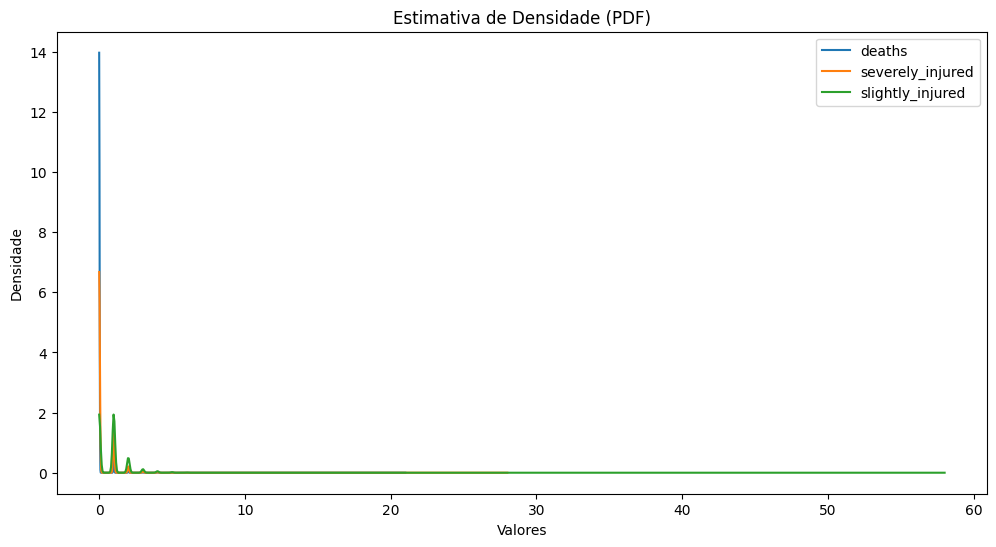

In [ ]:
plt.figure(figsize=(12, 6))
for col in numeric_cols:
    kde = gaussian_kde(df[col].dropna())
    x_range = np.linspace(df[col].min(), df[col].max(), 1000)
    plt.plot(x_range, kde(x_range), label=col)

plt.xlabel("Valores")
plt.ylabel("Densidade")
plt.title("Estimativa de Densidade (PDF)")
plt.legend()
plt.show()

**Descrição do Gráfico: Estimativa de Densidade (PDF) de Acidentes**  

O gráfico exibe a estimativa de densidade de probabilidade (*Probability Density Function - PDF*) para diferentes categorias de vítimas em acidentes: mortes (*deaths*), ferimentos graves (*severely injured*) e ferimentos leves (*slightly injured*).  

### **Eixos:**  
- **Eixo X (horizontal):** Representa a quantidade de vítimas em cada categoria.  
- **Eixo Y (vertical):** Mostra a densidade de probabilidade, indicando a distribuição das ocorrências.  


O gráfico sugere que a maioria dos acidentes resulta em ferimentos leves, com um número menor de feridos graves e um número ainda menor de mortes. A concentração de mortes e ferimentos graves próximos de zero indica que a maioria dos acidentes não resulta em fatalidades ou ferimentos graves.

## **CDF (Função de Distribuição Acumulada)**

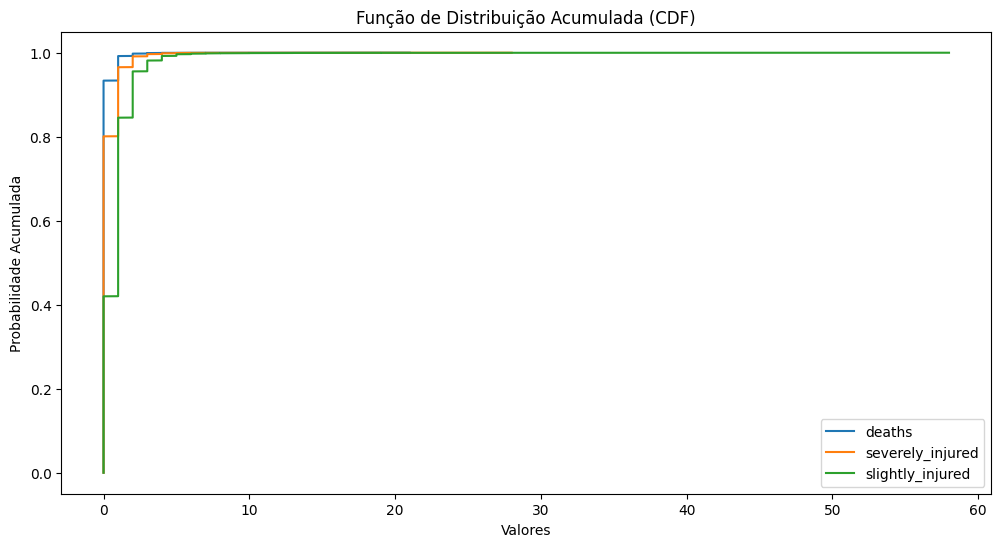

In [ ]:
plt.figure(figsize=(12, 6))
for col in numeric_cols:
    sorted_data = np.sort(df[col].dropna())
    cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    plt.plot(sorted_data, cdf, label=col)

plt.xlabel("Valores")
plt.ylabel("Probabilidade Acumulada")
plt.title("Função de Distribuição Acumulada (CDF)")
plt.legend()
plt.show()

**Descrição do Gráfico: Função de Distribuição Acumulada (CDF) de Acidentes**  

O gráfico exibe a **Função de Distribuição Acumulada (CDF - Cumulative Distribution Function)** para diferentes categorias de vítimas em acidentes: mortes (*deaths*), feridos graves (*severely injured*) e feridos leves (*slightly injured*).  

### **Eixos:**  
- **Eixo X (horizontal):** Representa o número de vítimas em cada categoria.  
- **Eixo Y (vertical):** Mostra a probabilidade acumulada, indicando a proporção de casos que ocorrem até determinado valor no eixo X.  



**Interpretação das curvas:**

**Curva azul (deaths):** Atinge 1 (ou seja, 100% de probabilidade acumulada) em um valor relativamente baixo no eixo x. Isso significa que a maioria das mortes (deaths) se concentra em valores pequenos.

**Curva laranja (severely_injured)**: Leva um pouco mais para atingir 1, indicando que os ferimentos graves (severely_injured) têm uma distribuição mais dispersa, com alguns valores mais altos.

**Curva verde (slightly_injured):** Atinge 1 em um valor ainda maior no eixo x, mostrando que os ferimentos leves (slightly_injured) têm a maior dispersão e incluem valores mais altos.

## **Considerações Finais**

**Importância dos Gráficos e Tarefas de Mineração de Dados** <br>

Os gráficos utilizados ao longo do trabalho foram indispensáveis para transformar dados brutos em insights visuais claros e acessíveis, possibilitando a identificação rápida de padrões e anomalias. Cada tipo de gráfico foi cuidadosamente selecionado para representar a relação entre os atributos de forma mais eficaz, auxiliando na validação ou refutação das hipóteses.

As tarefas de mineração de dados, por sua vez, complementaram a análise visual ao explorar relações mais complexas e ocultas nos dados. Técnicas como clusterização e testes estatísticos não apenas validaram as hipóteses, mas também enriqueceram o entendimento sobre os fatores que influenciam os acidentes. A integração dessas abordagens demonstrou o poder da análise de dados em resolver problemas reais e fundamentar decisões baseadas em evidências.

Essas ferramentas, juntas, permitiram uma análise abrangente e detalhada, destacando a importância de métodos visuais e analíticos no processamento e interpretação de grandes volumes de dados.

**Conclusões Obtidas na Elaboração do Trabalho** <br>
A análise dos dados realizada neste trabalho permitiu validar parcialmente as hipóteses levantadas, destacando tendências relevantes e oferecendo novos insights sobre os padrões de acidentes. A seguir, detalhamos as principais conclusões obtidas, juntamente com a relevância dos gráficos e das tarefas de mineração de dados no processo de análise:

**Acidentes em finais de semana:**

***Importância do gráfico de barras:*** A visualização permitiu identificar rapidamente os padrões de frequência por dia da semana, facilitando a interpretação dos dados e direcionando o foco para os períodos críticos.

***Relevância da mineração de dados:*** O teste estatístico complementou a análise gráfica, fornecendo uma base quantitativa robusta para validar a hipótese
A distribuição dos acidentes entre os dias da semana é uniforme, ou seja, não há evidência de que certos dias (como finais de semana) tenham mais acidentes do que outros de forma significativa, segundo esse teste..

**Acidentes noturnos associados a causas específicas:**

***Relevância da clusterização:*** A tarefa de mineração de dados permitiu identificar padrões complexos que não seriam evidentes apenas por meio de gráficos, enriquecendo a análise e oferecendo novas perspectivas. E pode-se dizer que a hipótese foi refutada, uma vez que a clusterização só conseguiu ser validada em questão do consumo de álcool e não associada ao período/horário do acidente.

**Estradas de pista simples e acidentes graves:** <br>

***Importância do gráfico de barras:*** O gráfico possibilitou comparar diretamente a distribuição de acidentes por tipo de rodovia, evidenciando a disparidade.

**Condições climáticas adversas e gravidade dos acidentes:** <br>
Os dados confirmaram uma relação entre condições climáticas adversas (chuva, neblina, entre outras) e a ocorrência de acidentes graves.

***Importância dos gráficos combinados:*** A combinação de gráficos, como histogramas e dispersões, permitiu uma análise detalhada da relação entre clima e gravidade dos acidentes, ilustrando padrões que não seriam facilmente perceptíveis apenas com tabelas.

Esta regra filtrada sugere que, apesar de uma confiança moderada (65.4%) de que "chuva" leva a "vítimas feridas", a associação entre essas duas condições não é forte. O lift abaixo de 1, leverage negativa, e conviction baixa indicam que, na verdade, "chuva" não está fortemente associada a acidentes graves com vítimas feridas. Isso reflete uma associação fraca, o que refuta a hipótese de que condições climáticas adversas resultam em mais acidentes graves.


**Horários de pico e frequência de acidentes:** <br>
Foi verificado um aumento expressivo de acidentes durante os horários de pico, especialmente no período da manhã e no final da tarde.

***Importância do gráfico de linhas:*** O gráfico de linhas foi crucial para evidenciar os picos de frequência ao longo do dia, facilitando a visualização de tendências temporais.

***Relevância da mineração de dados***: A análise temporal dos dados proporcionou uma visão detalhada dos momentos críticos, fundamentando sugestões de intervenções específicas.

**Gráficos adicionais:** <br>
Em conjunto, os gráficos revelam que a maioria dos acidentes apresenta impacto mínimo em termos de vítimas, concentrando-se em eventos sem fatalidades ou ferimentos graves. Os acidentes com maior número de vítimas, embora existam, são menos frequentes e, portanto, menos representativos da realidade geral.

Essa análise sugere que as medidas de segurança e prevenção devem ser direcionadas para a redução do número de acidentes como um todo, visando, em primeiro lugar, a diminuição dos eventos com potencial de causar qualquer tipo de vítima, mesmo que leve.

## **Referências Bibliográficas**

KNAFLIC, Cole Nussbaumer. **Storytelling with Data: A Data Visualization Guide for Business Professionals.** 1. ed. Hoboken: Wiley, 2015.


LIPPO, Marco. **Car accidents in Brazil (2017-2023)**. Disponível em: <https://www.kaggle.com/datasets/mlippo/car-accidents-in-brazil-2017-2023>. Acesso em: 13 dez.2024.

MCKINNEY, Wes. **Python for Data Analysis: Data Wrangling with Pandas, NumPy, and Jupyter**. 3. ed. Sebastopol: O'Reilly Media, 2022.

OPENAI. **ChatGPT**. Disponível em: <https://chat.openai.com/>. Acesso em: 13 dez.2024.
